                   Plant Disease Detection And Fertilizer Recommadation System




## Import Required Library


In [1]:
import os
import torch
from torchvision.datasets import ImageFolder
import torchvision.transforms as tt
import torch.nn as nn
import torch.nn.functional as F
from matplotlib import figure
from torchvision.utils import make_grid
from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader
import matplotlib.pyplot as plt
%matplotlib inline
import gc



<!-- connect -->

# ---> Connect the Google Drive to Google Colab

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Create Path of Plant Disease from Goggle Colab

In [3]:
folder_path = '/content/drive/MyDrive/Plantdiseases'

# List all the files in the folder

In [4]:
# List all the files in the folder
file_list = os.listdir(folder_path)

In [5]:
file_list

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry___healthy',
 'Cherry___Powdery_mildew',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn___Common_rust',
 'Corn___healthy',
 'Corn___Northern_Leaf_Blight',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___healthy',
 'Strawberry___Leaf_scorch',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomat

# Count Images in each file

In [6]:
for cls in file_list:
  print(cls, ':', len(os.listdir(folder_path  + '/' + cls)))

Apple___Apple_scab : 990
Apple___Black_rot : 990
Apple___Cedar_apple_rust : 990
Apple___healthy : 994
Blueberry___healthy : 991
Cherry___healthy : 989
Cherry___Powdery_mildew : 1042
Corn___Cercospora_leaf_spot Gray_leaf_spot : 990
Corn___Common_rust : 961
Corn___healthy : 911
Corn___Northern_Leaf_Blight : 701
Grape___Black_rot : 1009
Grape___Esca_(Black_Measles) : 1092
Grape___healthy : 910
Grape___Leaf_blight_(Isariopsis_Leaf_Spot) : 1046
Orange___Haunglongbing_(Citrus_greening) : 903
Peach___Bacterial_spot : 1036
Peach___healthy : 940
Pepper,_bell___Bacterial_spot : 981
Pepper,_bell___healthy : 1086
Potato___Early_blight : 990
Potato___healthy : 990
Potato___Late_blight : 990
Raspberry___healthy : 981
Soybean___healthy : 1063
Squash___Powdery_mildew : 1143
Strawberry___healthy : 990
Strawberry___Leaf_scorch : 1099
Tomato___Bacterial_spot : 1066
Tomato___Early_blight : 911
Tomato___healthy : 1088
Tomato___Late_blight : 1028
Tomato___Leaf_Mold : 990
Tomato___Septoria_leaf_spot : 991
To



# Import Dataset of Plant_Disease



In [7]:

dataset = ImageFolder(folder_path, transform = tt.Compose([
    tt.Resize(255), tt.RandomCrop(224), tt.ToTensor()]))

In [8]:
dataset

Dataset ImageFolder
    Number of datapoints: 39028
    Root location: /content/drive/MyDrive/Plantdiseases
    StandardTransform
Transform: Compose(
               Resize(size=255, interpolation=bilinear, max_size=None, antialias=warn)
               RandomCrop(size=(224, 224), padding=None)
               ToTensor()
           )

# Visualizatioz Of Plant_Disease Images

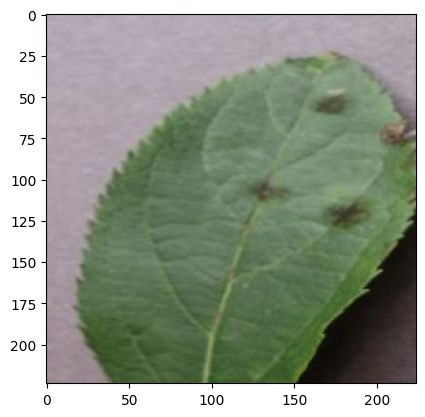

In [9]:
image, label = dataset[14]
plt.imshow(image.permute(1,2,0))

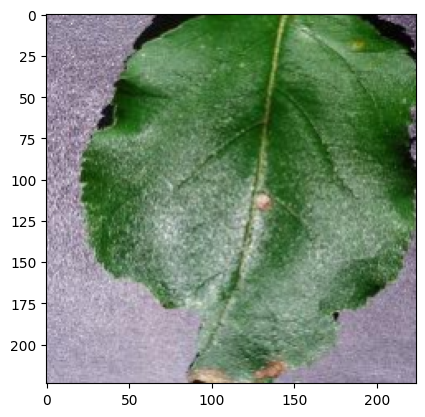

In [10]:
image, label = dataset[1555]
plt.imshow(image.permute(1,2,0))

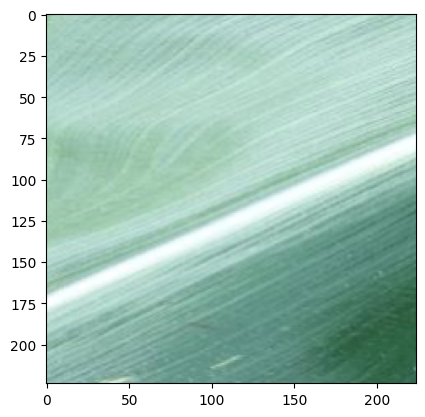

In [11]:
image, label = dataset[11114]
plt.imshow(image.permute(1,2,0))

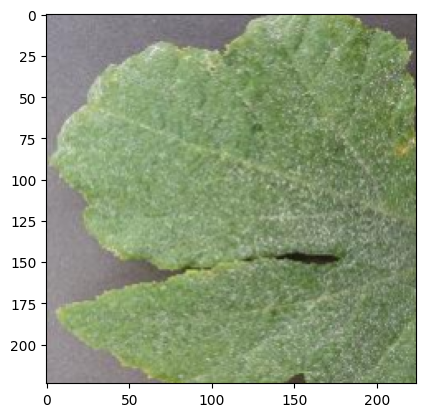

In [12]:
image, label = dataset[25984]
plt.imshow(image.permute(1,2,0))

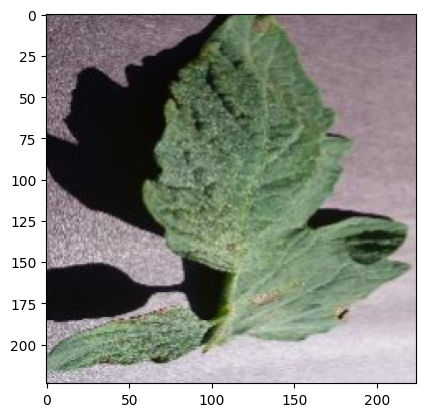

In [13]:
image, label = dataset[30024]
plt.imshow(image.permute(1,2,0))

# Split The dataset Into Train And  Valid


*   **Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using gradient descent.

*   **Validt set** - used to evaluate the model during training, adjust hyperparameters (learning rate, etc.), and pick the best version of the model.



In [14]:
size_per = 0.2
valid_size = int(len(dataset) * size_per)
train_size = len(dataset) - valid_size

train_ds, valid_ds = random_split(dataset, [train_size, valid_size])
print("Length of Train dataset :",len(train_ds))
print("Length of Valid dataset :",len(valid_ds))

Length of Train dataset : 31223
Length of Valid dataset : 7805


# Create PyTorch Data Loaders for Training and validation.



In [15]:
batch_size = 64
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
valid_dl = DataLoader(valid_ds, batch_size, num_workers=4, pin_memory=True)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# Visualization  of sample images from the training dataloader.

In [16]:
def show_batch(dl):
  for image, _ in dl:
    px, ax = plt.subplots(figsize=(16,12))
    ax.set_xticks([]), ax.set_yticks([])
    ax.imshow(make_grid(image, nrow=16).permute(1,2,0))
    torch.cuda.empty_cache
    break


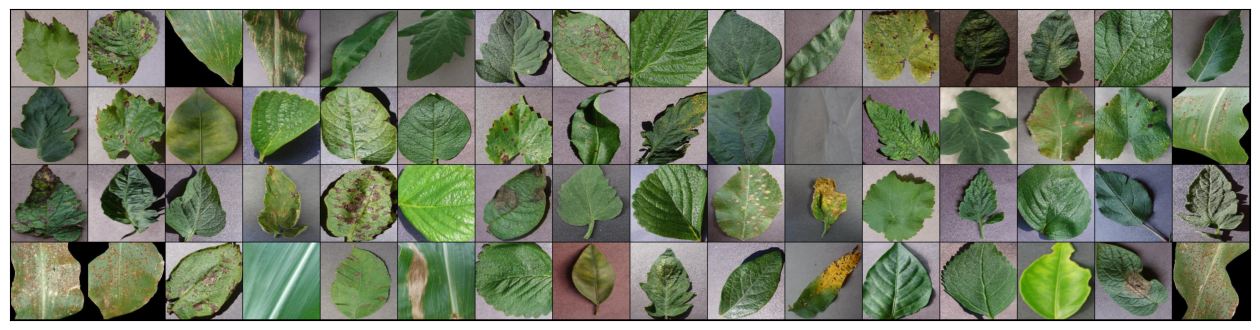

In [17]:
show_batch(train_dl)



## GPU Utility
We will use a couple of helper tools to use a GPU smoothly. Some helper functions and a helper class were defined to move our model and data to the GPU as needed.

In [18]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)


Based on where you're running this notebook, your default device could be a CPU (torch.device('cpu')) or a GPU (torch.device('cuda'))


In [19]:
device = get_default_device()
device

device(type='cuda')

We can now wrap our training and validation data loaders using DeviceDataLoader for automatically transferring batches of data to the GPU (if available).

In [20]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

## Model Training & utility
We will define our models by extending an PlantDiseaseDetection class which contains helper methods for training & validation in future steps:


In [21]:
class PlantDiseaseDetection(nn.Module):
    """ calculate the loss of batch of training dataloader"""
    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        torch.cuda.empty_cache
        return loss
    """calculate the loss and accuracy of batch of validation dataloader"""
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)
        torch.cuda.empty_cache          # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))


In [22]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

@torch.no_grad()
def evaluate(model, val_loader):
    """ Define the model's performance on validation set..."""
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        for batch in train_loader:
            torch.cuda.empty_cache
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            torch.cuda.empty_cache
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
        torch.cuda.empty_cache
    return history

## Model CNN
Next, we will train our models using the following functions:

In [23]:
class CNN(PlantDiseaseDetection):
    def __init__(self, K):
        super(CNN, self).__init__()
        self.conv_layers = nn.Sequential(
            # conv1
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2),
            # conv2
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2),
            # conv3
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2),
            # conv4
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.MaxPool2d(2),
        )

        self.dense_layers = nn.Sequential(
            nn.Dropout(0.4),
            nn.Linear(50176, 1024),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(1024, K),
        )

    def forward(self, X):
        out = self.conv_layers(X)

        # Flatten
        out = out.view(-1, 50176)

        # Fully connected
        out = self.dense_layers(out)

        return out

In [24]:
model = to_device(CNN(len(dataset.classes)), device)
model

CNN(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)

## Pass one batch of input tensor through model

In [25]:
torch.cuda.empty_cache
for batch in train_dl:
  images, labels = batch
  print("images_shape:", images.shape)
  print("image_device:", images.device)
  pred = model(images)
  print('pred_shape:', pred.shape)
  torch.cuda.empty_cache
  break

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


images_shape: torch.Size([64, 3, 224, 224])
image_device: cuda:0
pred_shape: torch.Size([64, 39])


In [ ]:
history = [evaluate(model, valid_dl)]
history

[{'val_loss': 3.6636831760406494, 'val_acc': 0.024228395894169807}]

In [ ]:
%%time
history += fit(5, 0.001, model, train_dl, valid_dl, torch.optim.Adam)

Epoch [0], train_loss: 2.8633, val_loss: 1.3993, val_acc: 0.5908
Epoch [1], train_loss: 1.6239, val_loss: 1.1322, val_acc: 0.6514
Epoch [2], train_loss: 1.3222, val_loss: 1.1883, val_acc: 0.6538
Epoch [3], train_loss: 1.1590, val_loss: 0.7727, val_acc: 0.7748
Epoch [4], train_loss: 1.0069, val_loss: 0.8692, val_acc: 0.7457
CPU times: user 3min 29s, sys: 3min 26s, total: 6min 56s
Wall time: 30min 30s


In [ ]:
%%time
history += fit(5, 0.0001, model, train_dl, valid_dl, torch.optim.Adam)

Epoch [0], train_loss: 0.6089, val_loss: 0.3714, val_acc: 0.8848
Epoch [1], train_loss: 0.4865, val_loss: 0.3257, val_acc: 0.8955
Epoch [2], train_loss: 0.4336, val_loss: 0.3529, val_acc: 0.8979
Epoch [3], train_loss: 0.3769, val_loss: 0.2751, val_acc: 0.9135
Epoch [4], train_loss: 0.3427, val_loss: 0.2779, val_acc: 0.9138
CPU times: user 4min 6s, sys: 4min 14s, total: 8min 21s
Wall time: 12min 16s


In [ ]:
%%time
history += fit(5, 0.00001, model, train_dl, valid_dl, torch.optim.Adam)

Epoch [0], train_loss: 0.2994, val_loss: 0.2514, val_acc: 0.9235
Epoch [1], train_loss: 0.2868, val_loss: 0.2490, val_acc: 0.9236
Epoch [2], train_loss: 0.2776, val_loss: 0.2417, val_acc: 0.9260
Epoch [3], train_loss: 0.2699, val_loss: 0.2383, val_acc: 0.9268
Epoch [4], train_loss: 0.2652, val_loss: 0.2353, val_acc: 0.9287
CPU times: user 4min 2s, sys: 4min 11s, total: 8min 14s
Wall time: 16min 6s


In [ ]:
%%time
history += fit(5, 0.000001, model, train_dl, valid_dl, torch.optim.Adam)

Epoch [0], train_loss: 0.2663, val_loss: 0.2271, val_acc: 0.9318
Epoch [1], train_loss: 0.2652, val_loss: 0.2343, val_acc: 0.9302
Epoch [2], train_loss: 0.2640, val_loss: 0.2243, val_acc: 0.9320
Epoch [3], train_loss: 0.2528, val_loss: 0.2334, val_acc: 0.9290
Epoch [4], train_loss: 0.2617, val_loss: 0.2308, val_acc: 0.9303
CPU times: user 4min 1s, sys: 4min 9s, total: 8min 11s
Wall time: 12min 22s


#Save The Model

In [ ]:
# Save the model
model_path = '/content/Plant_Disease_Detection_Model.pth'
torch.save(model.state_dict(), model_path)

In [ ]:
import shutil

# Destination path in Google Drive
drive_dest_path = '/content/drive/My Drive/Plant_model/model.pth'

# Copy the model to Google Drive
shutil.copyfile(model_path, drive_dest_path)

'/content/drive/My Drive/Plant_model/model.pth'

#Load The Model

In [ ]:
targets_size = 39
model = CNN(targets_size)
model.load_state_dict(torch.load("/content/drive/MyDrive/Plant_Model2/model2_pth", map_location=torch.device('cpu')))
model.eval()

CNN(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)

#Plot the Accuracy Of Valid Dataset

In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

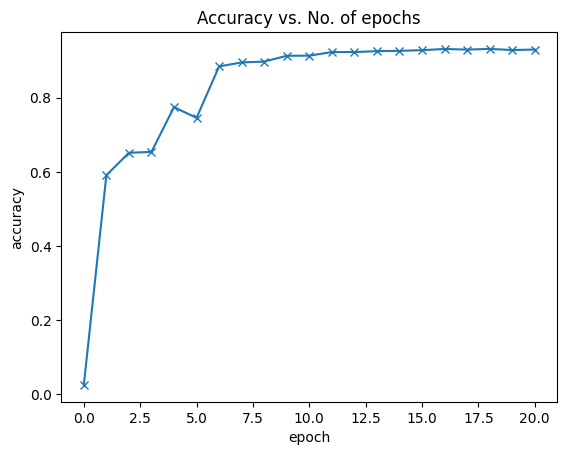

In [ ]:
plot_accuracies(history)

#Plot The Loss Of Training And Valid Dataset

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

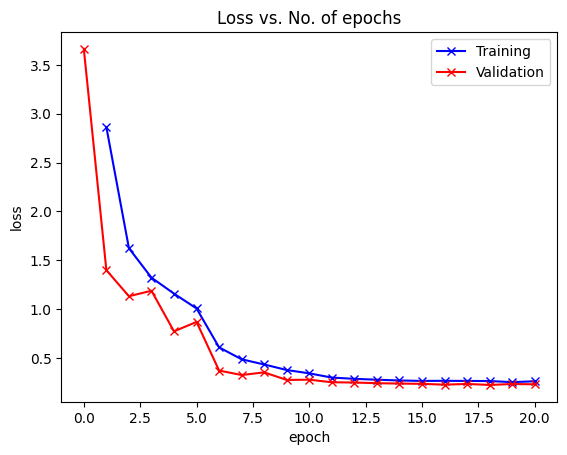

In [ ]:
plot_losses(history)

In [ ]:
model = to_device(model, device)

# Test with individual Image
While we have been tracking the overall accuracy of a model so far, it's also a good idea to look at model's results on some sample images. Let's test out our model with some images from the predefined test dataset of images.

In [ ]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

In [ ]:
def show_image_prediction(img, label):
  plt.imshow(img.permute(1, 2, 0))
  print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: Corn___healthy , Predicted: Corn___healthy


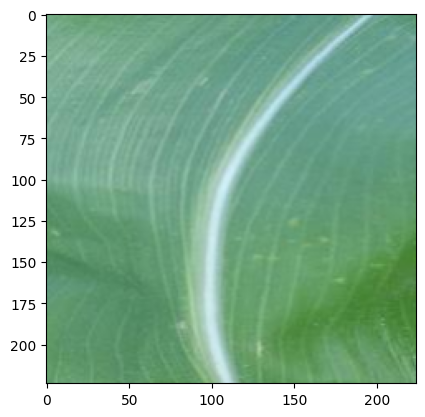

In [ ]:
show_image_prediction(*valid_ds[257])

Label: Grape___Leaf_blight_(Isariopsis_Leaf_Spot) , Predicted: Grape___Leaf_blight_(Isariopsis_Leaf_Spot)


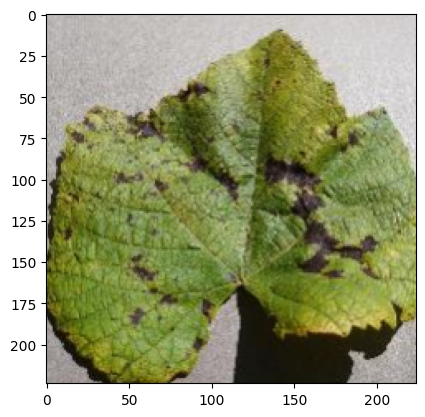

In [ ]:
show_image_prediction(*valid_ds[343])

Label: Strawberry___healthy , Predicted: Strawberry___healthy


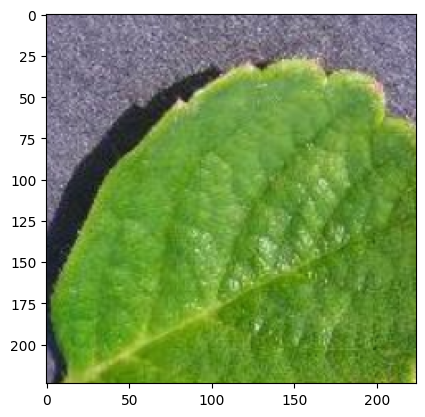

In [ ]:
show_image_prediction(*valid_ds[1023])

#Import Anthoer dataset Of Disease_Info

In [ ]:
import pandas as pd
data = pd.read_csv("disease_info.csv", encoding="latin-1")


#Import Library

In [ ]:
from PIL import Image
import numpy as np
import torchvision.transforms.functional as TF

#Single Image Of PlantDisease Prediction Which not contain the dataset

In [ ]:
def single_prediction(image_path):
    image = Image.open(image_path)
    image = image.resize((224, 224))
    input_data = TF.to_tensor(image)
    input_data = input_data.view((-1, 3, 224, 224))
    # xb = to_device(input_data.unsqueeze(0), device)
    output = model(input_data)
    output = output.detach().numpy()
    index = np.argmax(output)
    print("Original : ", image_path[29:-17])
    pred_csv = data["disease_name"][index]
    print(pred_csv)

In [ ]:
single_prediction("/content/drive/MyDrive/plant/Grape___Black_rot/image (188).JPG")

Original :  Grape___Black_rot
Grape : Black Rot


In [ ]:
single_prediction("/content/drive/MyDrive/plant/Potato___healthy/image (127).JPG")

Original :  Potato___healthy
Tomato : Mosaic Virus


In [ ]:
single_prediction("/content/drive/MyDrive/plant/Apple___Black_rot/image (101).JPG")

Original :  Apple___Black_rot
Apple : Black Rot


In [ ]:
single_prediction("/content/drive/MyDrive/plant/Apple___Black_rot/image (105).JPG")

Original :  Apple___Black_rot
Apple : Black Rot


In [ ]:
single_prediction("/content/drive/MyDrive/plant/Apple___Cedar_apple_rust/image (101).JPG")

Original :  Apple___Cedar_apple_rust
Apple : Cedar rust


In [ ]:
single_prediction("/content/drive/MyDrive/plant/Grape___Esca_(Black_Measles)/image (100).JPG")

Original :  Grape___Esca_(Black_Measles
Grape : Esca | Black Measles
